In [545]:
import pandas as pd

In [546]:
#exploring QVI_purchase_behaviour i.e customer data

In [547]:
df=pd.read_csv('QVI_purchase_behaviour.csv')

In [548]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [549]:
#Exploring the transactions and sales of chips for a chain of stores  in this jupyter notebook

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [551]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [552]:
df.duplicated().sum()

0

In [553]:
df['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [554]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [555]:
import matplotlib.pyplot as plt

In [556]:
#exploring QVI_transaction_data i.e chip purchases

In [557]:
df1=pd.read_excel('QVI_transaction_data.xlsx')

In [558]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [559]:
df1['DATE'].head(10)

0    43390
1    43599
2    43605
3    43329
4    43330
5    43604
6    43601
7    43601
8    43332
9    43330
Name: DATE, dtype: int64

In [560]:
#the date field doesnot make sense,it should be looked into further to get unambiguous data

We can see that the date column is in an integer format. Let's change this to a
date format.
 quick search online tells us that CSV and Excel integer dates begin on 30
Dec 1899

In [561]:
import datetime as dt

In [562]:
df1['real_date'] = pd.TimedeltaIndex(df1['DATE'], unit='d') + dt.datetime(1899, 12, 30)
df1['real_date']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: real_date, Length: 264836, dtype: datetime64[ns]

In [563]:
df1.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'real_date'],
      dtype='object')

In [564]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  int64         
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   real_date       264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [565]:
df1.drop('DATE',axis=1,inplace=True)
df1.rename(columns={'real_date':'DATE'},inplace=True)

In [566]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       264836 non-null  int64         
 1   LYLTY_CARD_NBR  264836 non-null  int64         
 2   TXN_ID          264836 non-null  int64         
 3   PROD_NBR        264836 non-null  int64         
 4   PROD_NAME       264836 non-null  object        
 5   PROD_QTY        264836 non-null  int64         
 6   TOT_SALES       264836 non-null  float64       
 7   DATE            264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [567]:
#date column has been fixed

In [568]:
df1.duplicated().sum()

1

In [569]:
df1[df1.duplicated()==True]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE
124845,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,2018-10-01


In [570]:
df1[df1['TXN_ID']==108462]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE
124843,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,2018-10-01
124844,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6,2018-10-01
124845,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,2018-10-01


In [571]:
df1.drop_duplicates(inplace=True)

In [572]:
df.duplicated().sum()

0

In [573]:
#removed the duplicate row

In [574]:
df1[df1['PROD_NAME']=='Kettle 135g Swt Pot Sea Salt'].index

Int64Index([    65,    153,    174,    177,    348,    354,    398,    623,
               711,    712,
            ...
            263732, 263950, 264001, 264547, 264561, 264564, 264574, 264725,
            264767, 264823],
           dtype='int64', length=3257)

In [575]:
df1['PROD_NAME'].replace('Kettle 135g Swt Pot Sea Salt','Kettle Swt Pot Sea Salt 135g',inplace=True)

In [576]:
df1[df1['PROD_NAME']=='Kettle 135g Swt Pot Sea Salt'].index

Int64Index([], dtype='int64')

In [577]:
df1[df1['PROD_NAME']=='Kettle Swt Pot Sea Salt 135g']

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE
65,83,83008,82099,63,Kettle Swt Pot Sea Salt 135g,2,8.4,2019-05-20
153,208,208139,206906,63,Kettle Swt Pot Sea Salt 135g,1,4.2,2019-05-17
174,237,237227,241132,63,Kettle Swt Pot Sea Salt 135g,2,8.4,2018-08-20
177,243,243070,246706,63,Kettle Swt Pot Sea Salt 135g,1,4.2,2019-05-17
348,7,7077,6604,63,Kettle Swt Pot Sea Salt 135g,2,8.4,2018-10-26
...,...,...,...,...,...,...,...,...
264564,260,260240,259480,63,Kettle Swt Pot Sea Salt 135g,2,8.4,2018-10-08
264574,261,261035,259860,63,Kettle Swt Pot Sea Salt 135g,2,8.4,2019-06-12
264725,266,266413,264246,63,Kettle Swt Pot Sea Salt 135g,1,4.2,2018-07-20
264767,269,269133,265839,63,Kettle Swt Pot Sea Salt 135g,2,8.4,2019-06-08


In [578]:
#fixed an error in semantics of the PROD_NAME 

In [579]:
#replacing special characters

In [580]:
df1.shape

(264835, 8)

In [581]:
df1.PROD_NAME.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [582]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('/',' ')

In [583]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('&',' ')

In [584]:
df1.PROD_NAME.value_counts()

Kettle Mozzarella   Basil   Pesto 175g      3304
Kettle Tortilla ChpsHny Jlpno Chili 150g    3296
Cobs Popd Swt Chlli  Sr Cream Chips 110g    3269
Tyrrells Crisps     Ched   Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream      Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [585]:
df1['PROD_NAME']=df1['PROD_NAME'].apply(lambda x: np.nan if 'Salsa' in x else x)

In [586]:
df1['PROD_NAME'].isnull().sum()

18094

In [587]:
df1.dropna(inplace=True)

In [588]:
df1['PROD_NAME'].isnull().sum()

0

removing salsa products as we are looking to explore only chips

In [589]:
df1['PROD_SIZE in Grams']=df1['PROD_NAME'].apply(lambda x:x[-4:-1])

In [590]:
df1[['PROD_NAME','PROD_SIZE in Grams']].head()

,PROD_NAME,PROD_SIZE in Grams
0,Natural Chip Compny SeaSalt175g,175
1,CCs Nacho Cheese 175g,175
2,Smiths Crinkle Cut Chips Chicken 170g,170
3,Smiths Chip Thinly S Cream Onion 175g,175
4,Kettle Tortilla ChpsHny Jlpno Chili 150g,150


We want only Product brand not their variety so extracting only brand Name from PROD_NAME

In [591]:
df1['PROD_NAME']=df1['PROD_NAME'].apply(lambda x:x.partition(' ')[0])

In [592]:
df1['PROD_NAME'].value_counts()

Kettle        41288
Smiths        27389
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: PROD_NAME, dtype: int64

In [593]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Woolworths','WW')

In [594]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Doritos','Dorito')

In [595]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Smiths','Smith')

In [596]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Infuzions','Infzns')

In [597]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Red','RRD')

In [598]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Natural','NCC')

In [599]:
df1['PROD_NAME']=df1['PROD_NAME'].str.replace('Sunbites','Snbts')

In [600]:
#some PROD_NAMES have been represented in more than one form bringing them into a uniform format

In [601]:
df1[['PROD_QTY','TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,246741.000000,246741.000000
mean,1.908061,7.321328
std,0.659832,3.077833
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


In [602]:
df1[df1['PROD_QTY']>df1['PROD_QTY'].quantile(0.75)]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE,PROD_SIZE in Grams
1,1,1307,348,66,CCs,3,6.3,2019-05-14,175
3,2,2373,974,69,Smith,5,15.0,2018-08-17,175
4,2,2426,1038,108,Kettle,3,13.8,2018-08-18,150
11,8,8294,8221,114,Kettle,5,23.0,2018-08-20,150
16,20,20418,17413,94,Burger,4,9.2,2018-08-18,220
...,...,...,...,...,...,...,...,...,...
258745,220,220338,219884,98,NCC,3,9.0,2019-05-19,175
258759,238,238169,242560,44,Thins,4,13.2,2019-05-14,175
258770,248,248246,250503,80,NCC,3,9.0,2019-05-18,175
258782,259,259174,258569,92,WW,3,5.1,2018-08-15,175


In [603]:
df1[df1['PROD_QTY']>10]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE,PROD_SIZE in Grams
69762,226,226000,226201,4,Dorito,200,650.0,2018-08-19,380
69763,226,226000,226210,4,Dorito,200,650.0,2019-05-20,380


In [604]:
#removing outliers having huge PROD_QTY

In [605]:
df1.shape

(246741, 9)

In [606]:
df1=df1[~(df1['PROD_QTY']>10)]# ~ for not

In [607]:
df1.shape

(246739, 9)

In [608]:
#combining dataset

In [609]:
df2=pd.merge(df,df1,on='LYLTY_CARD_NBR')

In [610]:
df2.shape

(246739, 11)

In [611]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE,PROD_SIZE in Grams
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,NCC,2,6.0,2018-10-17,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,RRD,1,2.7,2018-09-16,150
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain,1,3.6,2019-03-07,210
3,1003,YOUNG FAMILIES,Budget,1,4,106,NCC,1,3.0,2019-03-08,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW,1,1.9,2018-11-02,160


In [612]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246739 entries, 0 to 246738
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LYLTY_CARD_NBR      246739 non-null  int64         
 1   LIFESTAGE           246739 non-null  object        
 2   PREMIUM_CUSTOMER    246739 non-null  object        
 3   STORE_NBR           246739 non-null  int64         
 4   TXN_ID              246739 non-null  int64         
 5   PROD_NBR            246739 non-null  int64         
 6   PROD_NAME           246739 non-null  object        
 7   PROD_QTY            246739 non-null  int64         
 8   TOT_SALES           246739 non-null  float64       
 9   DATE                246739 non-null  datetime64[ns]
 10  PROD_SIZE in Grams  246739 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.6+ MB


In [613]:
df2.duplicated().sum()

0

In [614]:
#exploring Number of customers

In [615]:
df2['LYLTY_CARD_NBR'].nunique()

71287

In [616]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Transactions over time')

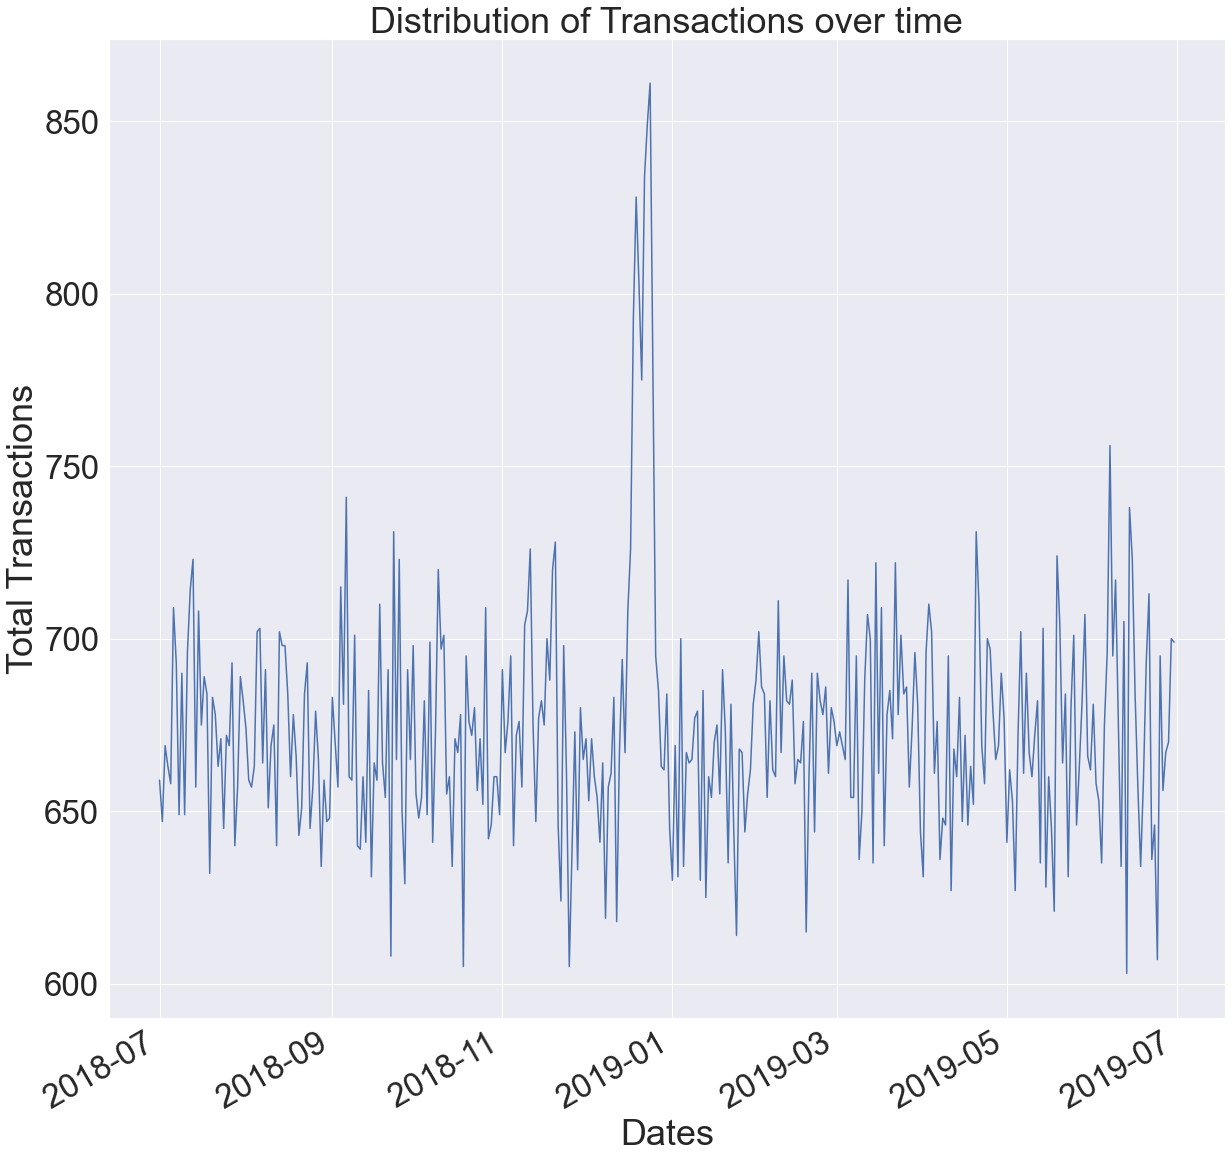

In [618]:
d_dates=df2.groupby('DATE')['TXN_ID'].nunique()
d_dates.plot(figsize=(20,20))
plt.xlabel('Dates')
plt.ylabel('Total Transactions')
plt.title('Distribution of Transactions over time')

In [619]:
#The huge spike in transactions could be beacuase of the holiday season in December

In [620]:
d_dates=d_dates.reset_index()

In [621]:
d_dates.rename(columns={'TXN_ID':'Number of Transactions'},inplace=True)

In [622]:
d_dates=d_dates[(d_dates['DATE']>='2018-12-01') & (d_dates['DATE']<='2018-12-31')]

In [623]:
d_dates=d_dates[(d_dates['DATE']>='2018-11-01') & (d_dates['DATE']<='2018-12-31') ]

In [624]:
d_dates.sort_values(by='DATE')

,DATE,Number of Transactions
153,2018-12-01,671
154,2018-12-02,653
155,2018-12-03,671
156,2018-12-04,660
157,2018-12-05,654
158,2018-12-06,641
159,2018-12-07,664
160,2018-12-08,619
161,2018-12-09,657
162,2018-12-10,661


In [626]:
#on exploring further we see that there are no purchases on 2018-12-25 due to Christmas public holiday when stores are closed

In [627]:
#exploring total amount spent by customers on average per transaction

In [628]:
df_sales=df2.groupby(['LYLTY_CARD_NBR','TXN_ID'])['TOT_SALES'].sum()

In [629]:
df_sales=df_sales.reset_index()

In [630]:
print('total amount spent by customers on average per transaction:',df_sales['TOT_SALES'].mean())

total amount spent by customers on average per transaction: 7.360326922371531


In [631]:
df_sales.rename(columns={'TOT_SALES':'TOT_amt_SPENT'},inplace=True)

In [632]:
df_sales['TOT_amt_SPENT'].describe()

count    245257.000000
mean          7.360327
std           2.549269
min           1.700000
25%           5.800000
50%           7.400000
75%           8.800000
max          33.000000
Name: TOT_amt_SPENT, dtype: float64

Text(0.5, 1.0, 'Distribution of Amount spent by customers on every transaction')

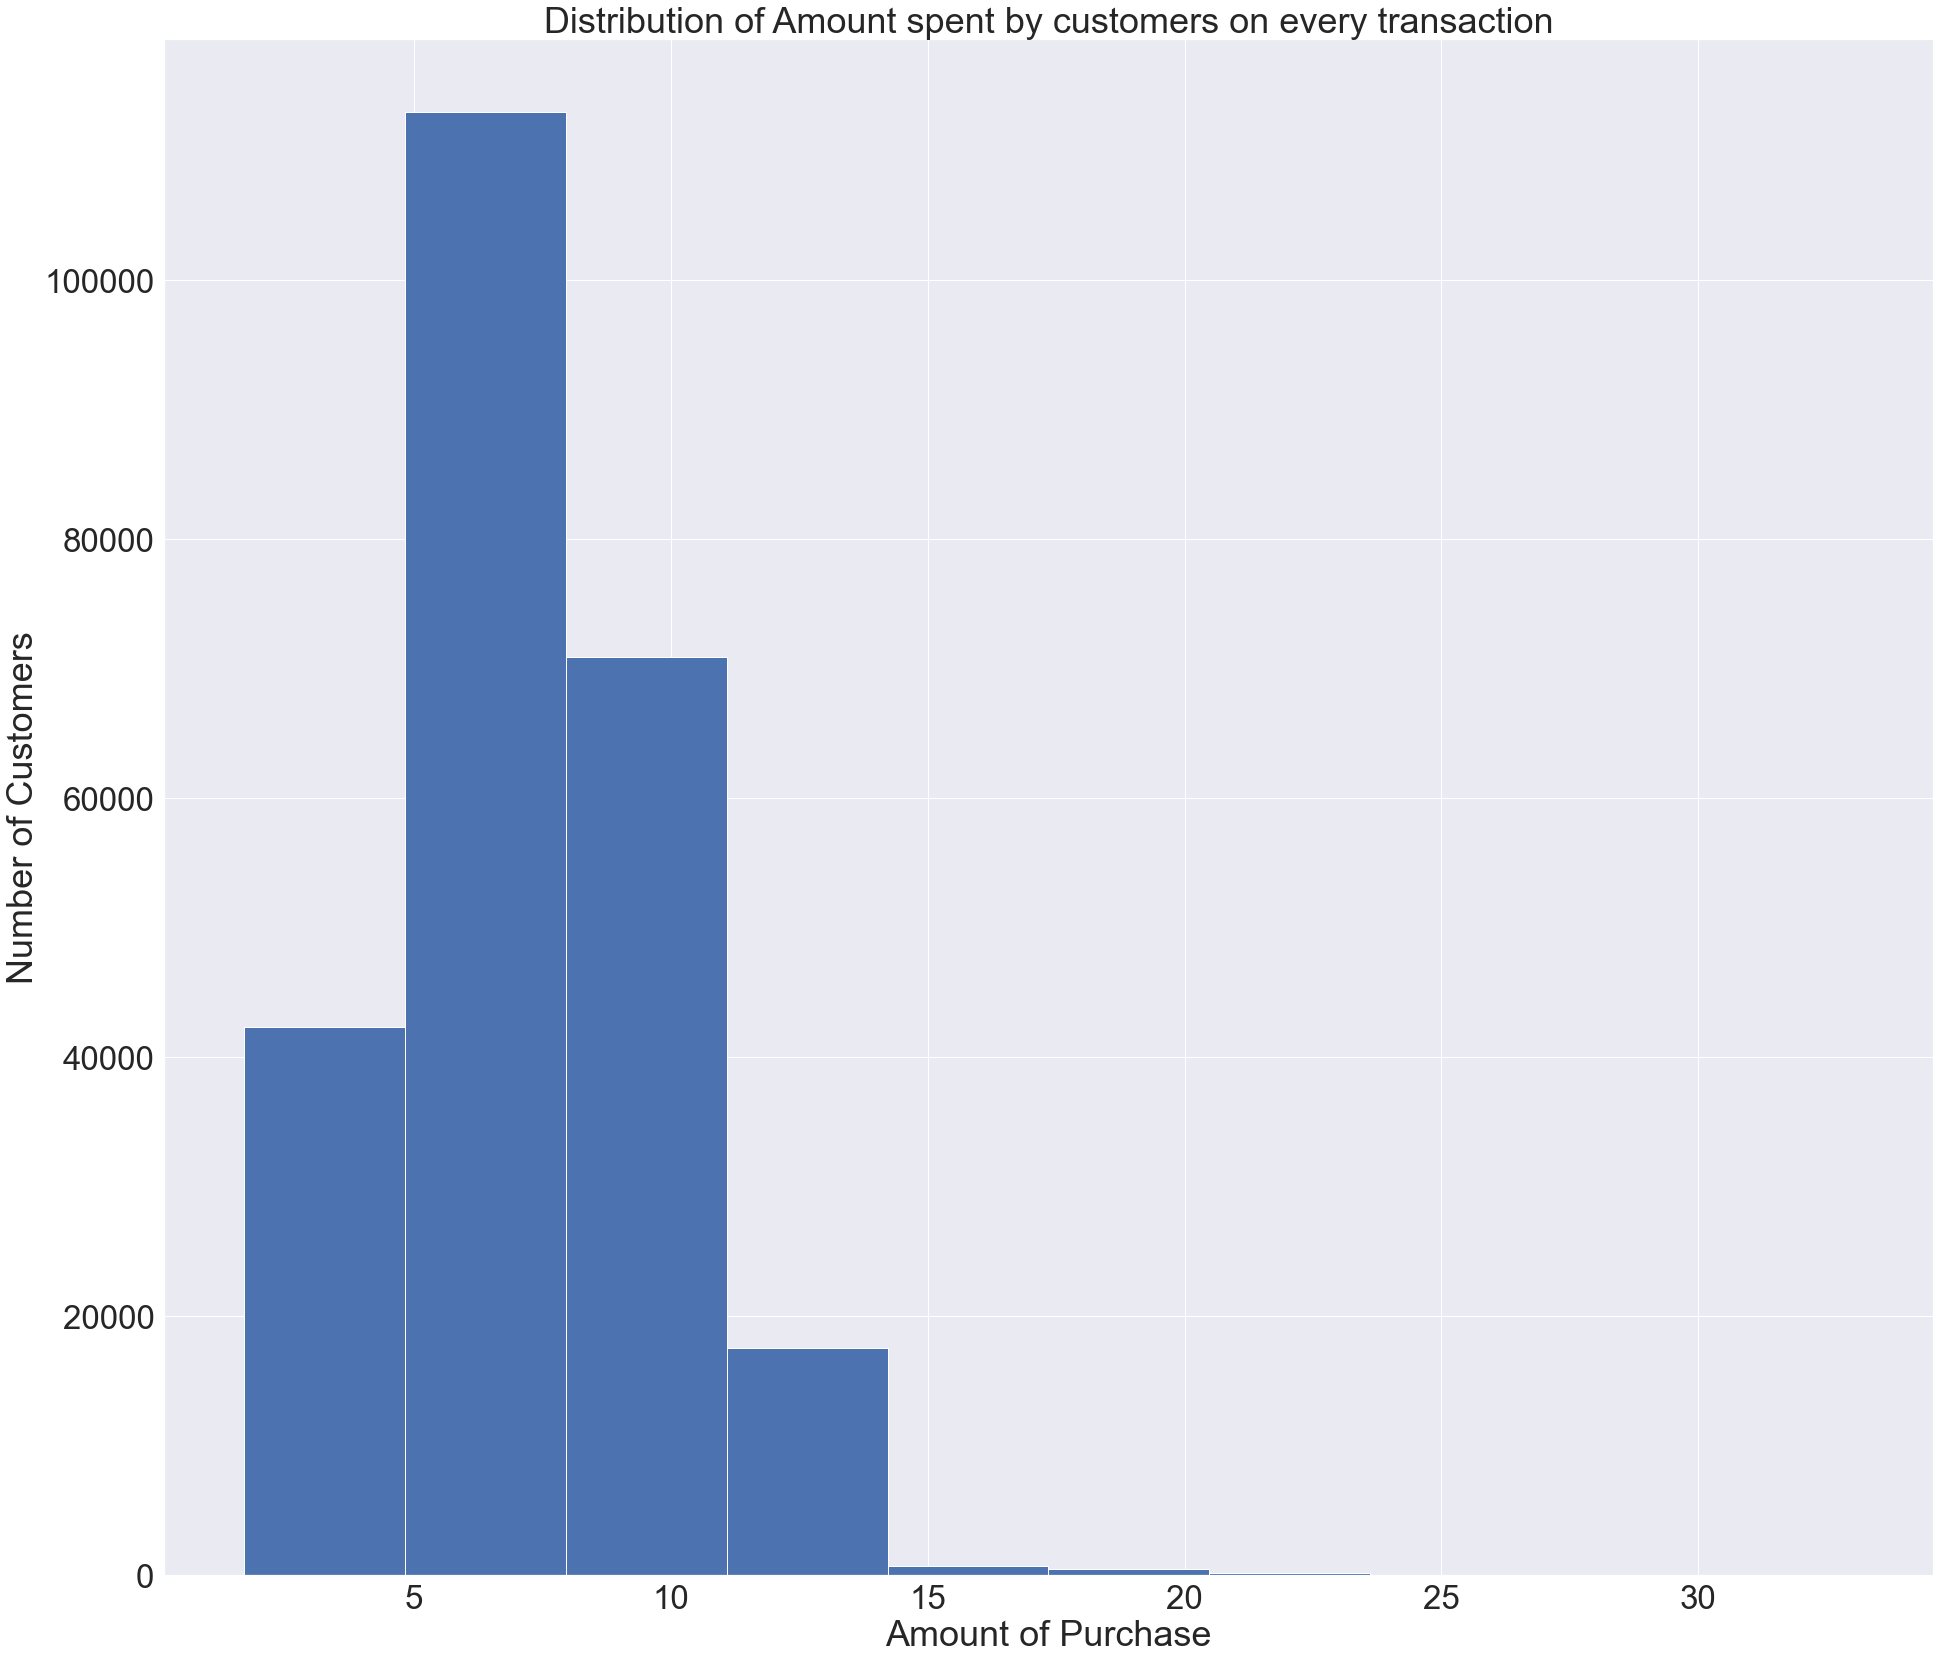

In [633]:
df_sales['TOT_amt_SPENT'].hist()
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Customers')
plt.title('Distribution of Amount spent by customers on every transaction')

In [634]:
df_transactions=df2.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique()

In [635]:
df_transactions=df_transactions.reset_index()

In [636]:
df_transactions.rename(columns={'TXN_ID':'Number_of_Transactions'},inplace=True)

In [637]:
df_transactions['Number_of_Transactions'].describe()

count    71287.000000
mean         3.440417
std          2.434758
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         17.000000
Name: Number_of_Transactions, dtype: float64

Text(0.5, 1.0, 'Distribution of Transactions made by customers from 2018-2019')

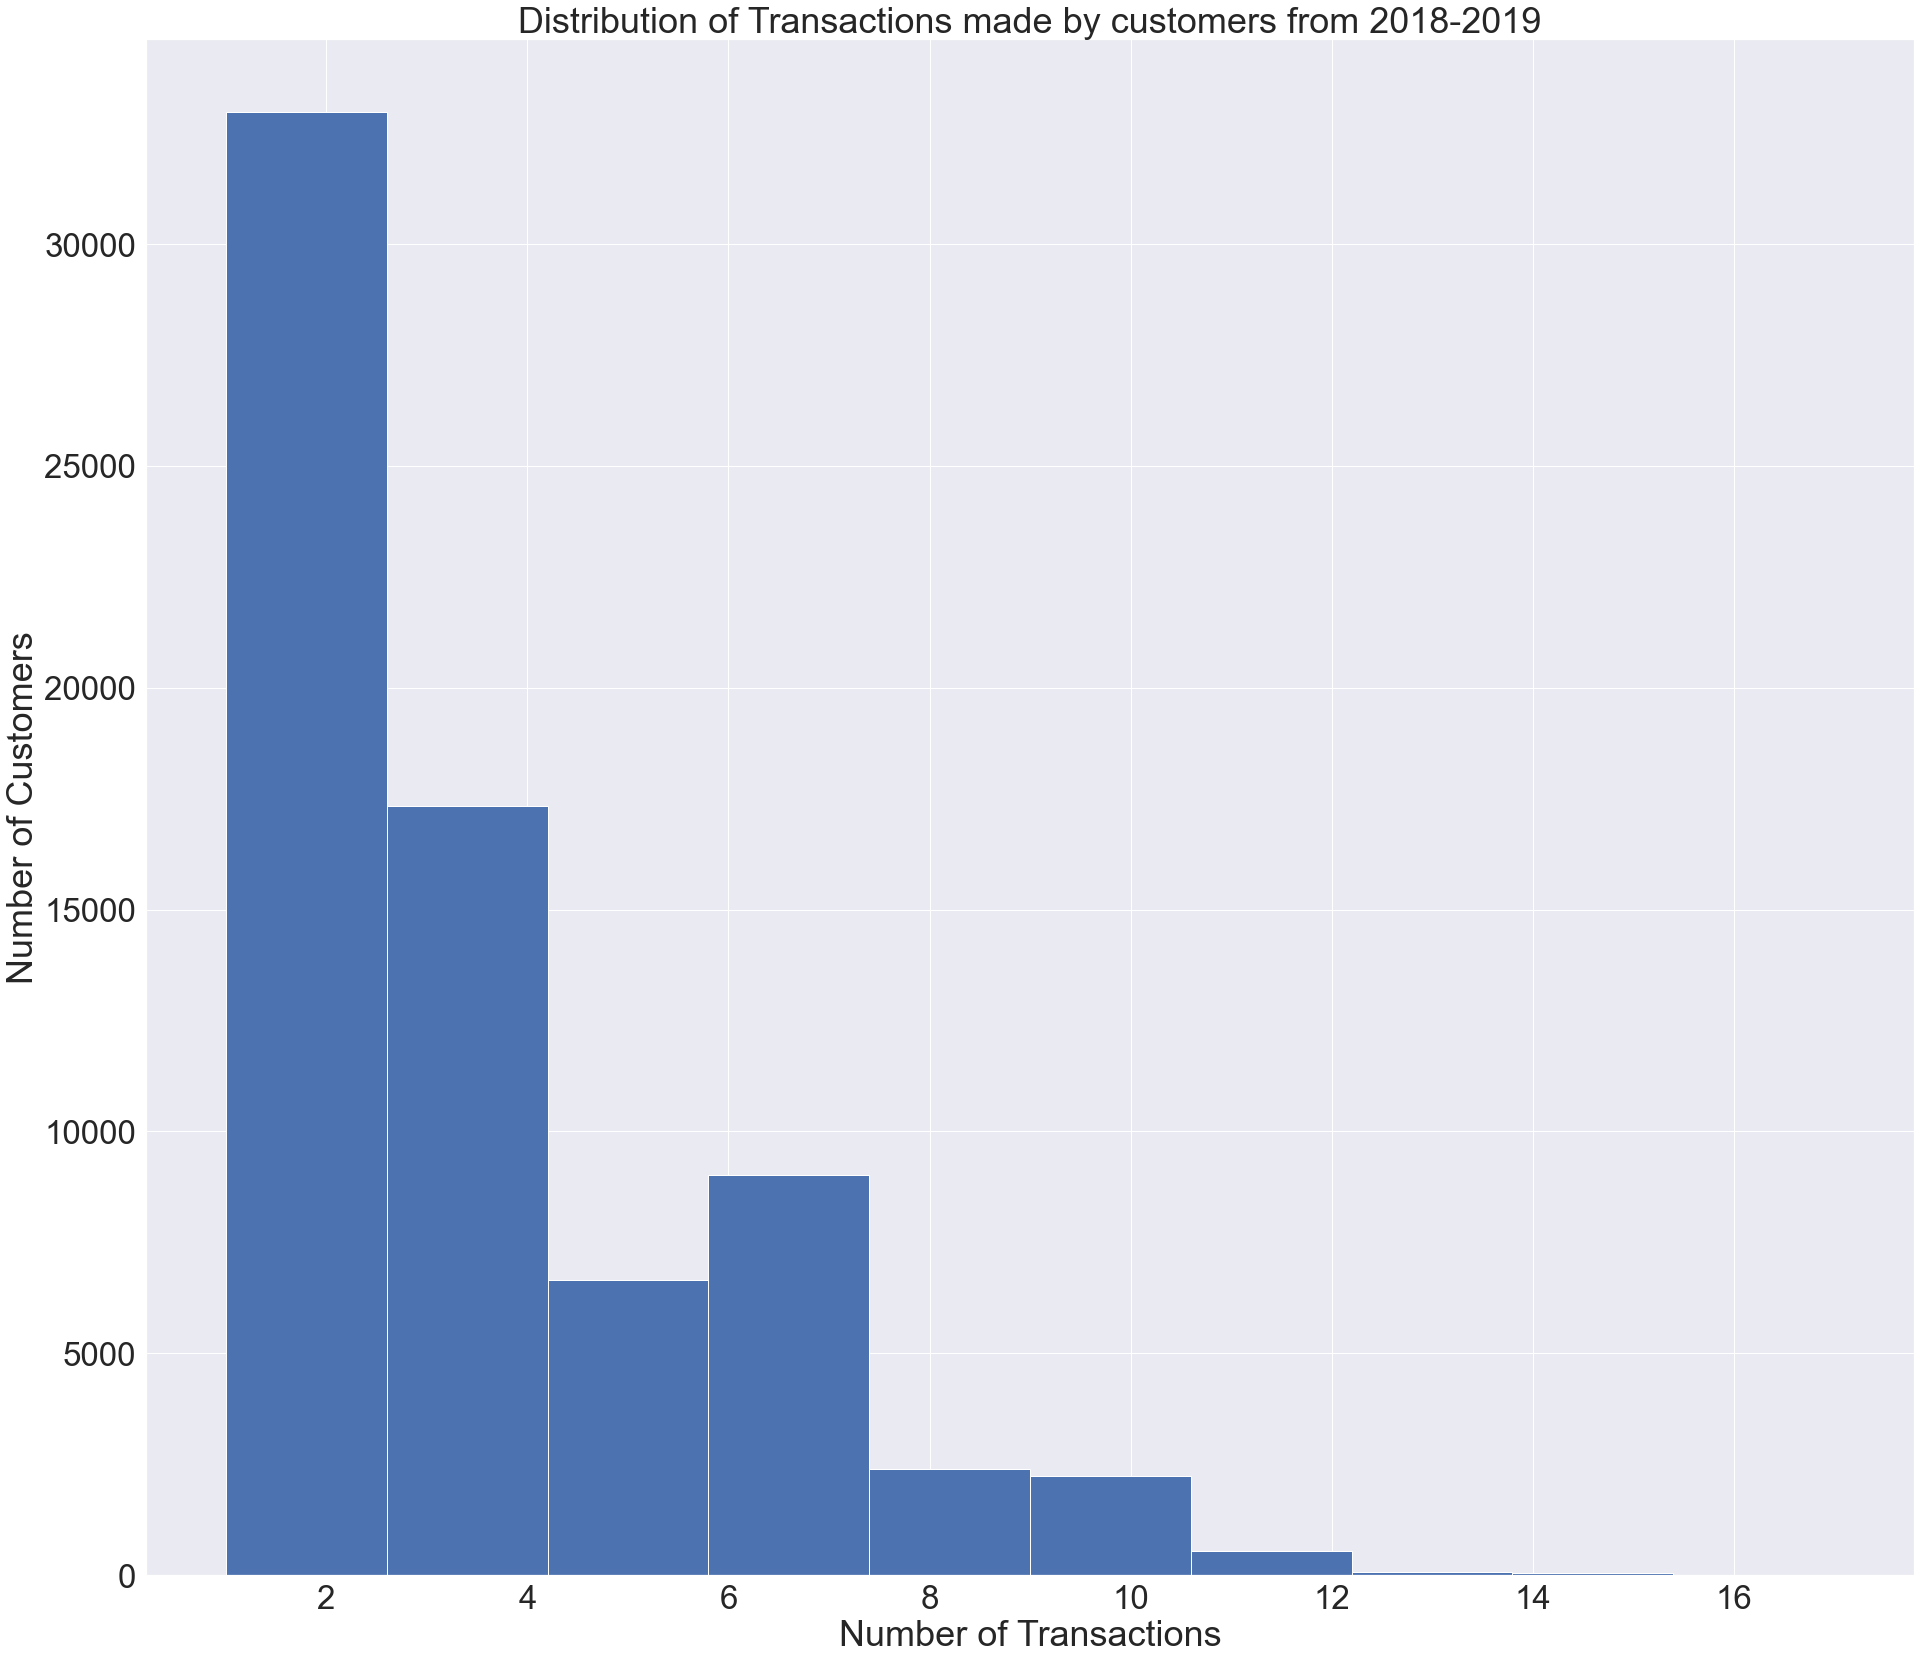

In [638]:
df_transactions['Number_of_Transactions'].hist()
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.title('Distribution of Transactions made by customers from 2018-2019')


In [639]:
#exploring products

In [640]:
df_products=df2.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False)

In [641]:
df_products=df_products.reset_index()

In [642]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Kettle'),
  Text(1, 0, 'Smith'),
  Text(2, 0, 'Dorito'),
  Text(3, 0, 'Pringles'),
  Text(4, 0, 'RRD'),
  Text(5, 0, 'Infzns'),
  Text(6, 0, 'Thins'),
  Text(7, 0, 'WW'),
  Text(8, 0, 'Cobs'),
  Text(9, 0, 'Tostitos'),
  Text(10, 0, 'Twisties'),
  Text(11, 0, 'NCC'),
  Text(12, 0, 'Tyrrells'),
  Text(13, 0, 'Grain'),
  Text(14, 0, 'Cheezels'),
  Text(15, 0, 'CCs'),
  Text(16, 0, 'Snbts'),
  Text(17, 0, 'Cheetos'),
  Text(18, 0, 'Burger'),
  Text(19, 0, 'GrnWves'),
  Text(20, 0, 'French')])

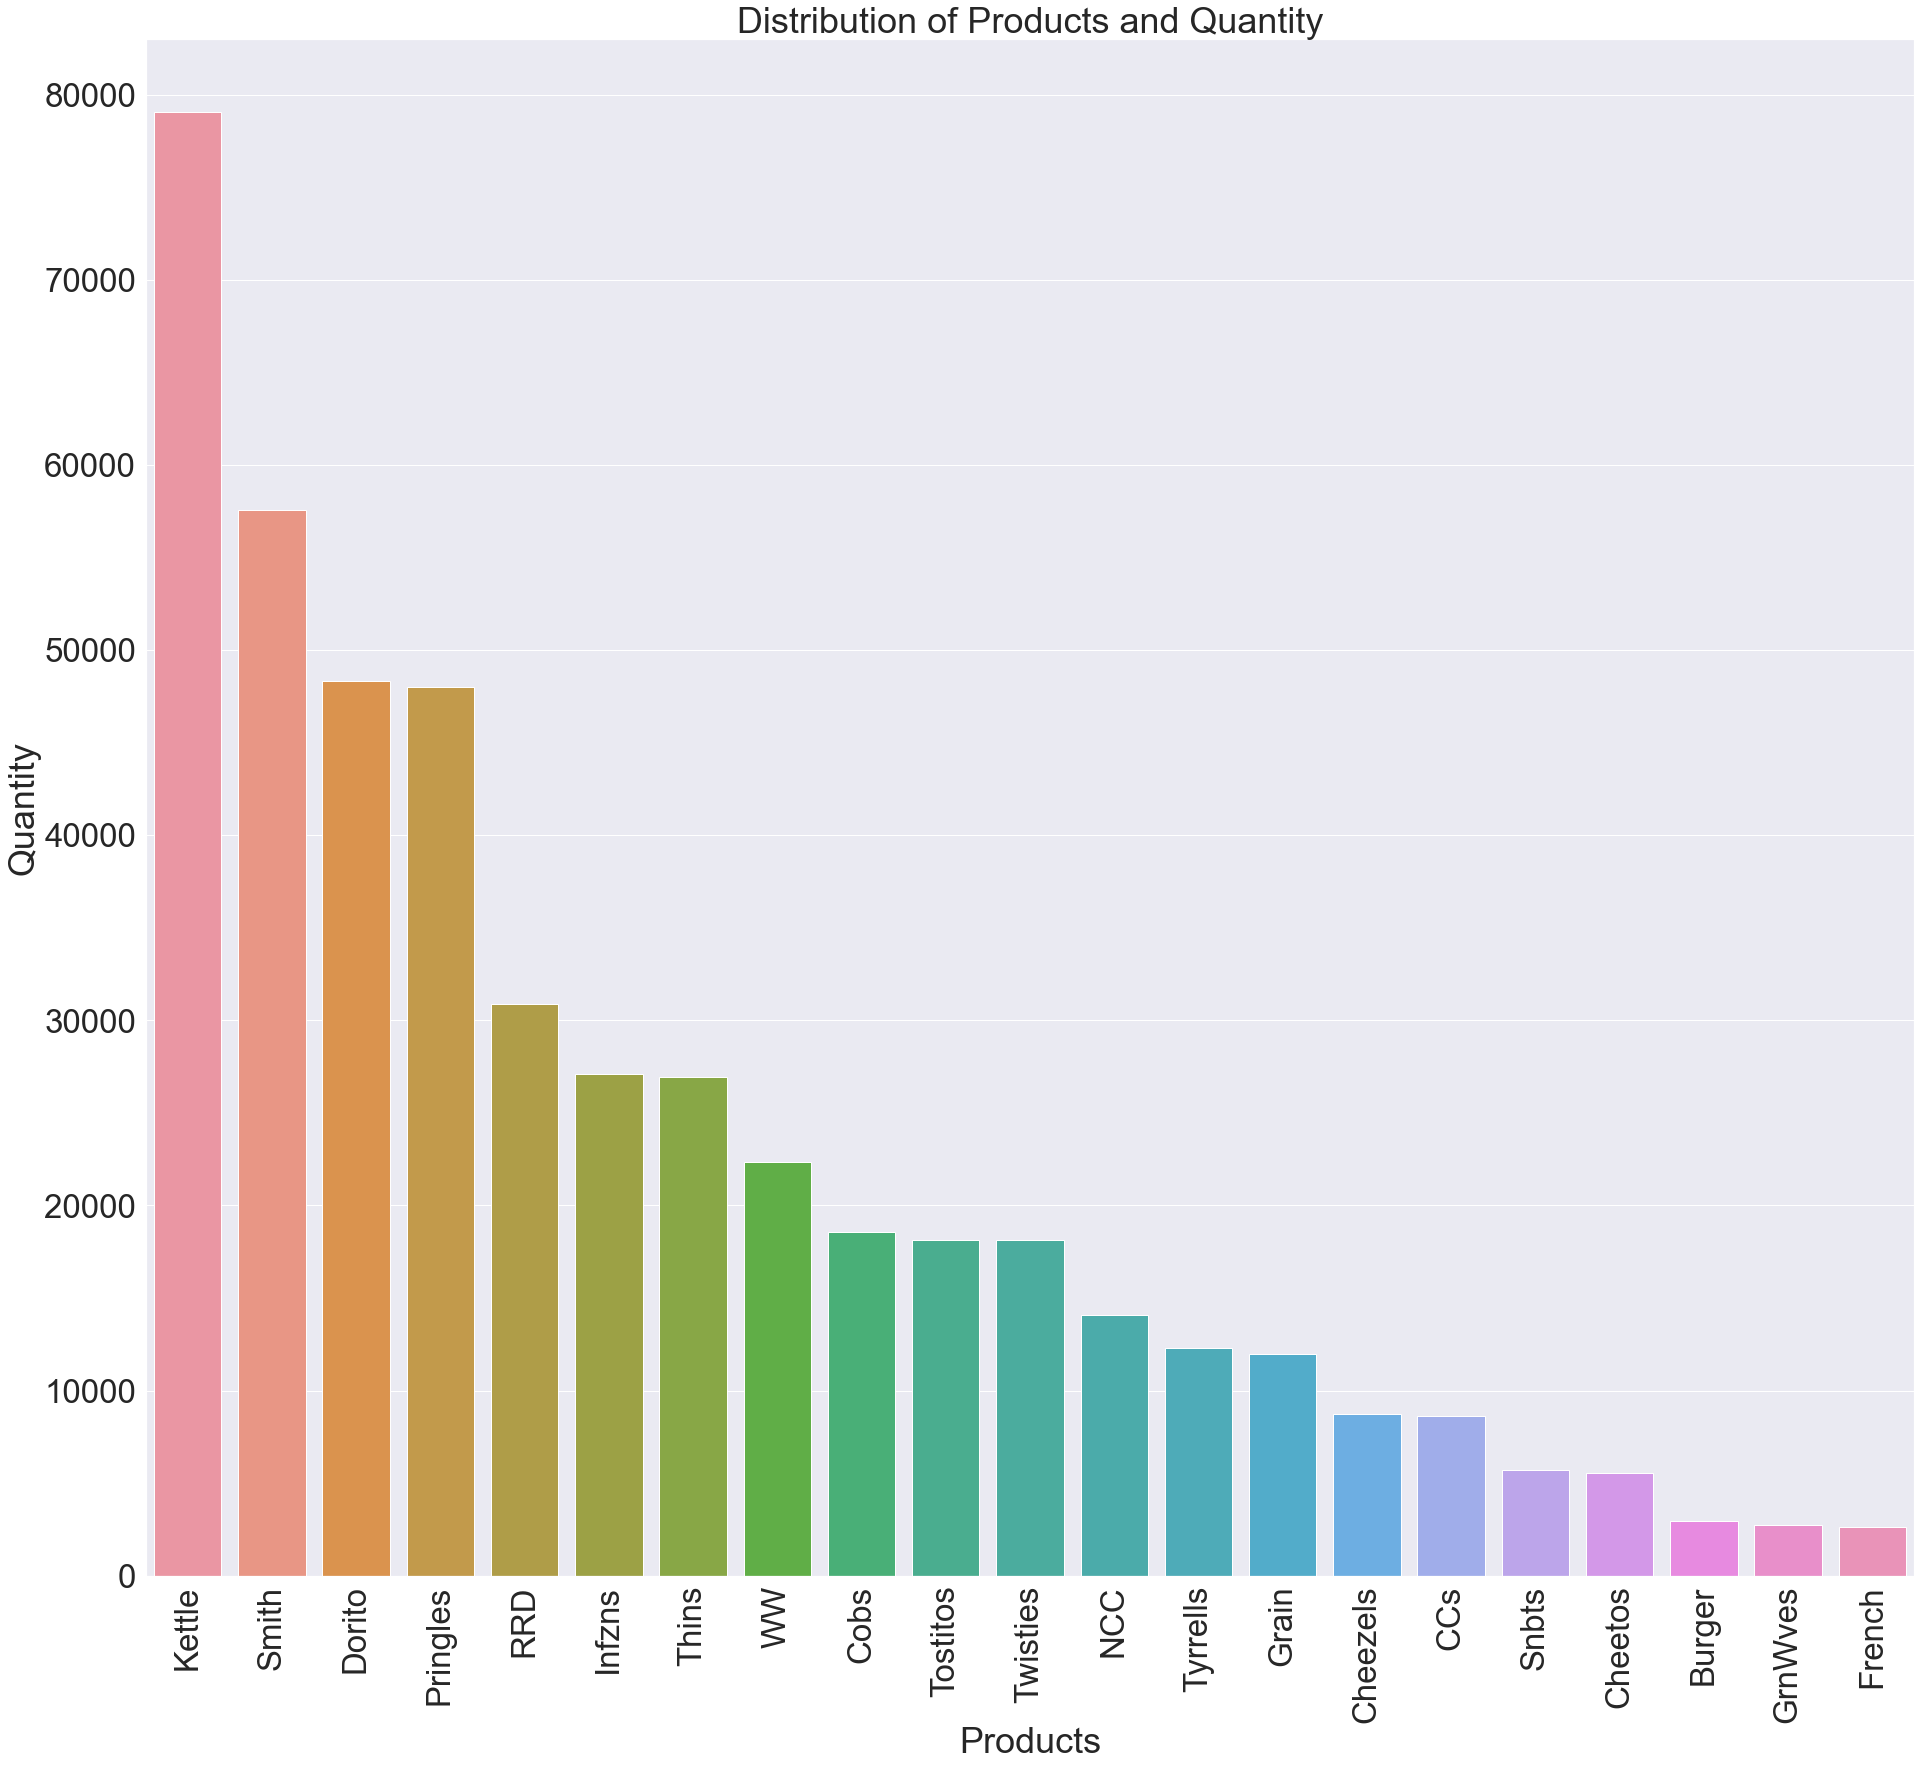

In [643]:
sns.barplot(x='PROD_NAME',y='PROD_QTY',data=df_products)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Distribution of Products and Quantity')
# figure size in inches
sns.set(rc={'figure.figsize':(31.7,28.27)})
sns.set(font_scale=3)
plt.xticks(rotation=90)

Kettle,Smiths and Dorito are top 3 products

exploring product size

In [644]:
df2['PROD_SIZE in Grams']=df2['PROD_SIZE in Grams'].astype('int')

In [645]:
df2['PROD_SIZE in Grams'].describe()

count    246739.000000
mean        175.583523
std          59.432239
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PROD_SIZE in Grams, dtype: float64

Text(0.5, 1.0, 'Distribution of Numbers of Products using Product Size')

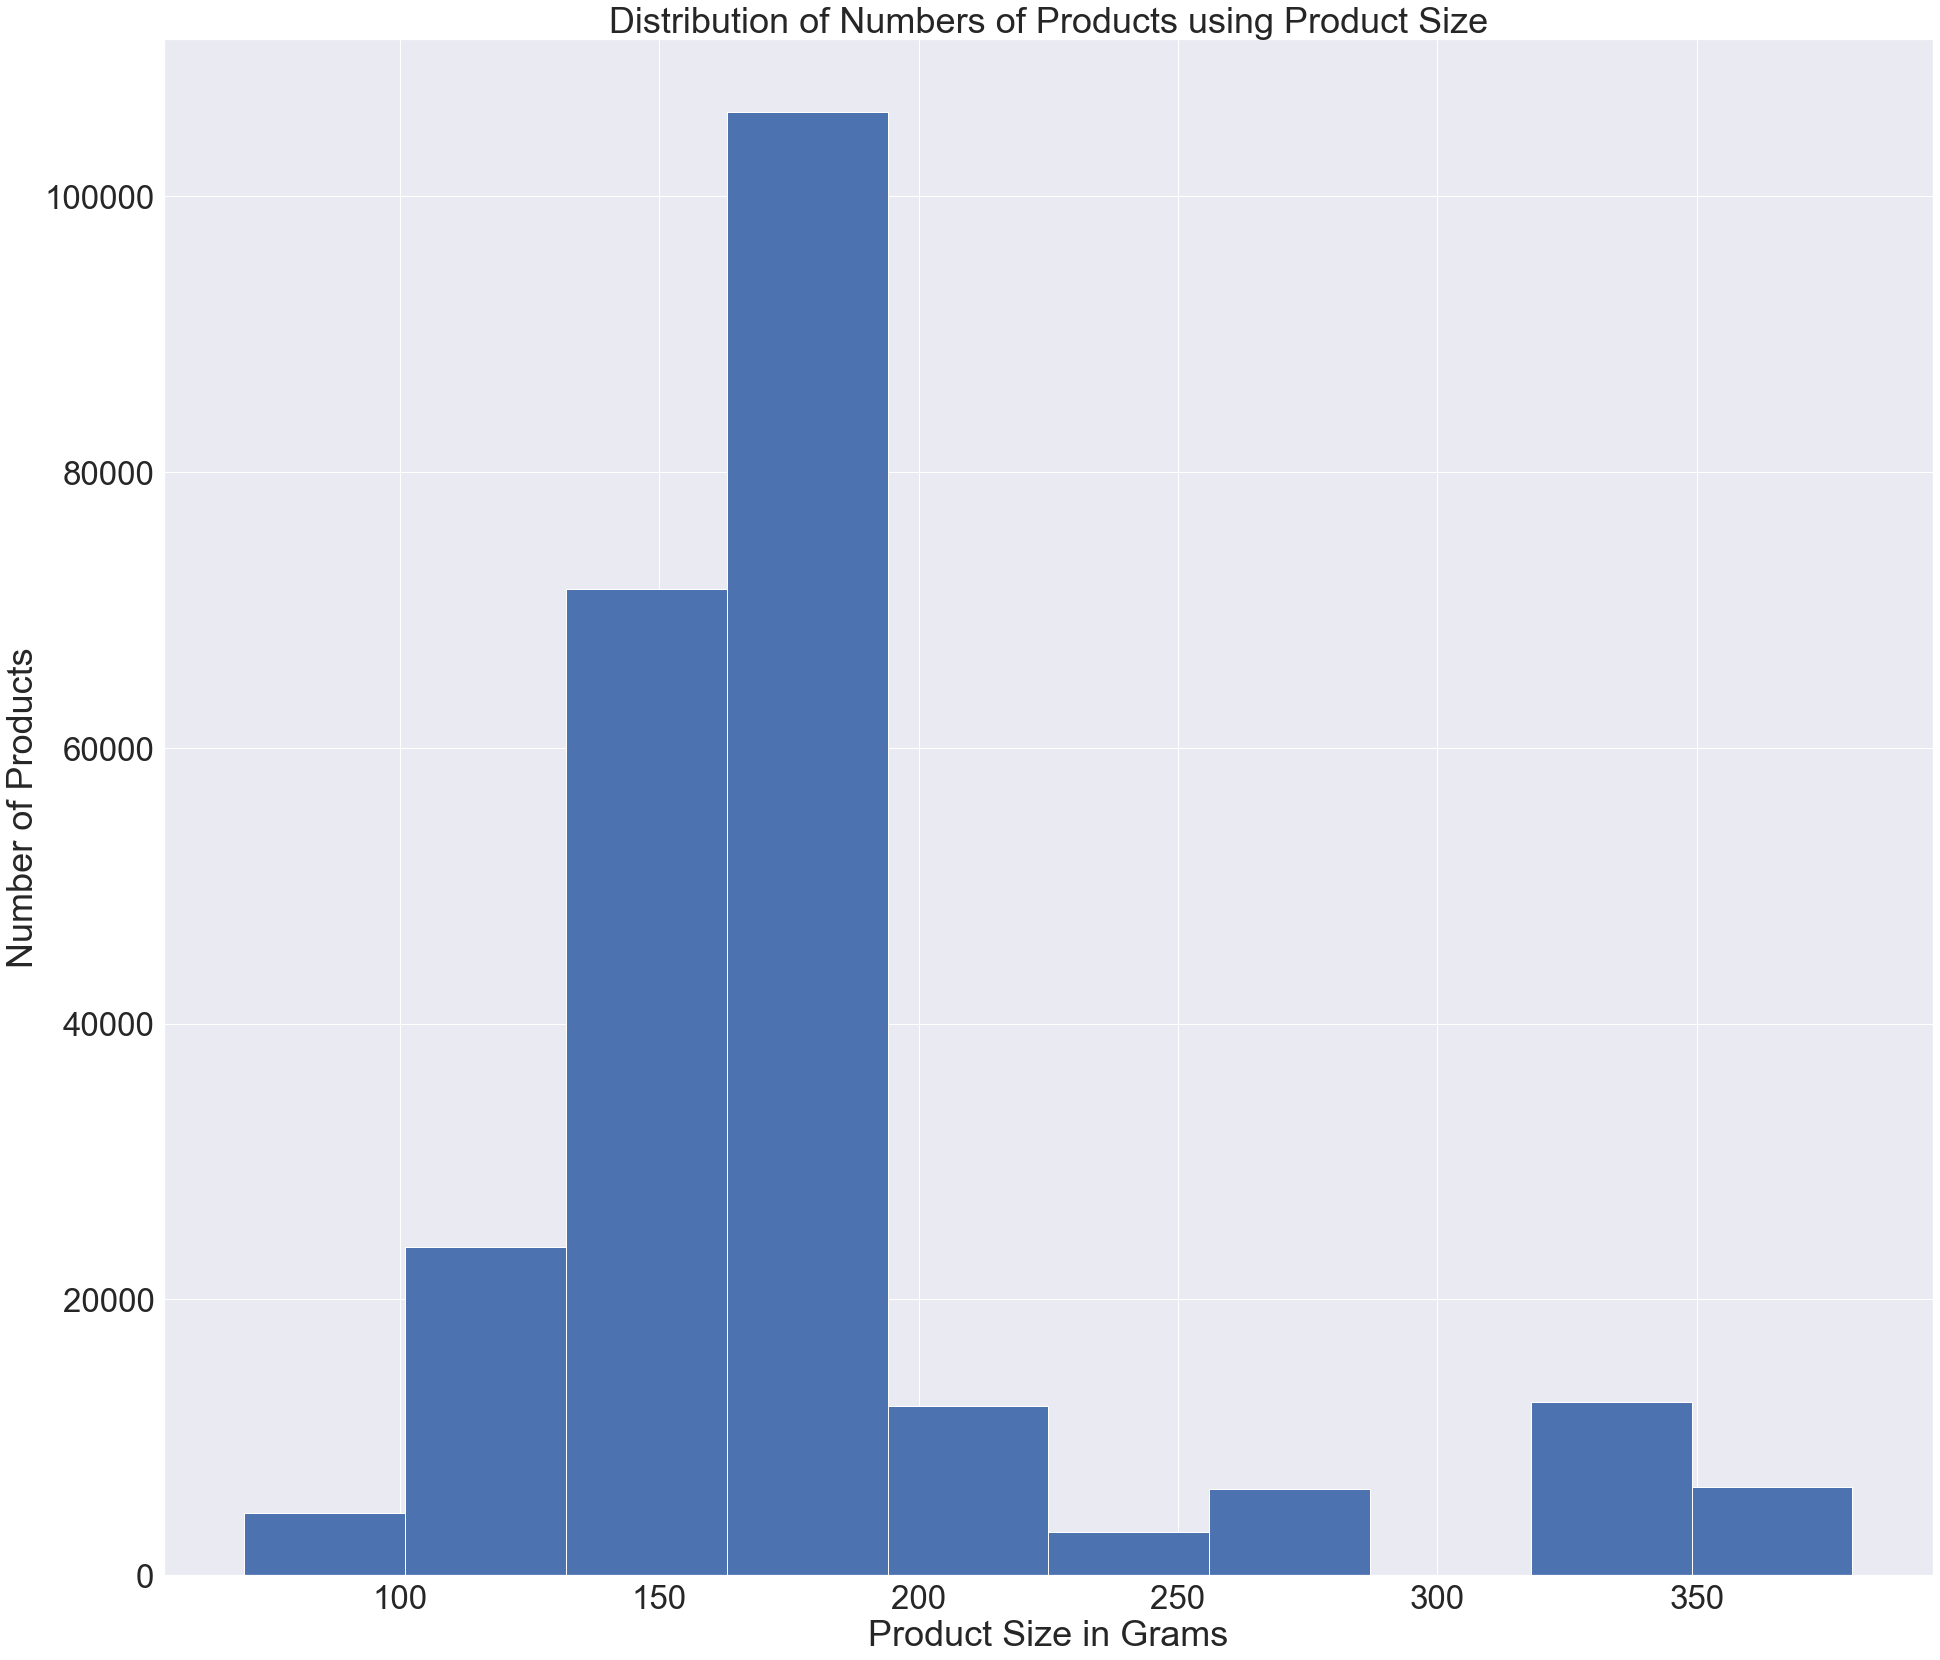

In [646]:
df2['PROD_SIZE in Grams'].hist()
plt.xlabel('Product Size in Grams')
plt.ylabel('Number of Products')
plt.title('Distribution of Numbers of Products using Product Size')


Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is

Text(0, 0.5, 'Number of Customers')

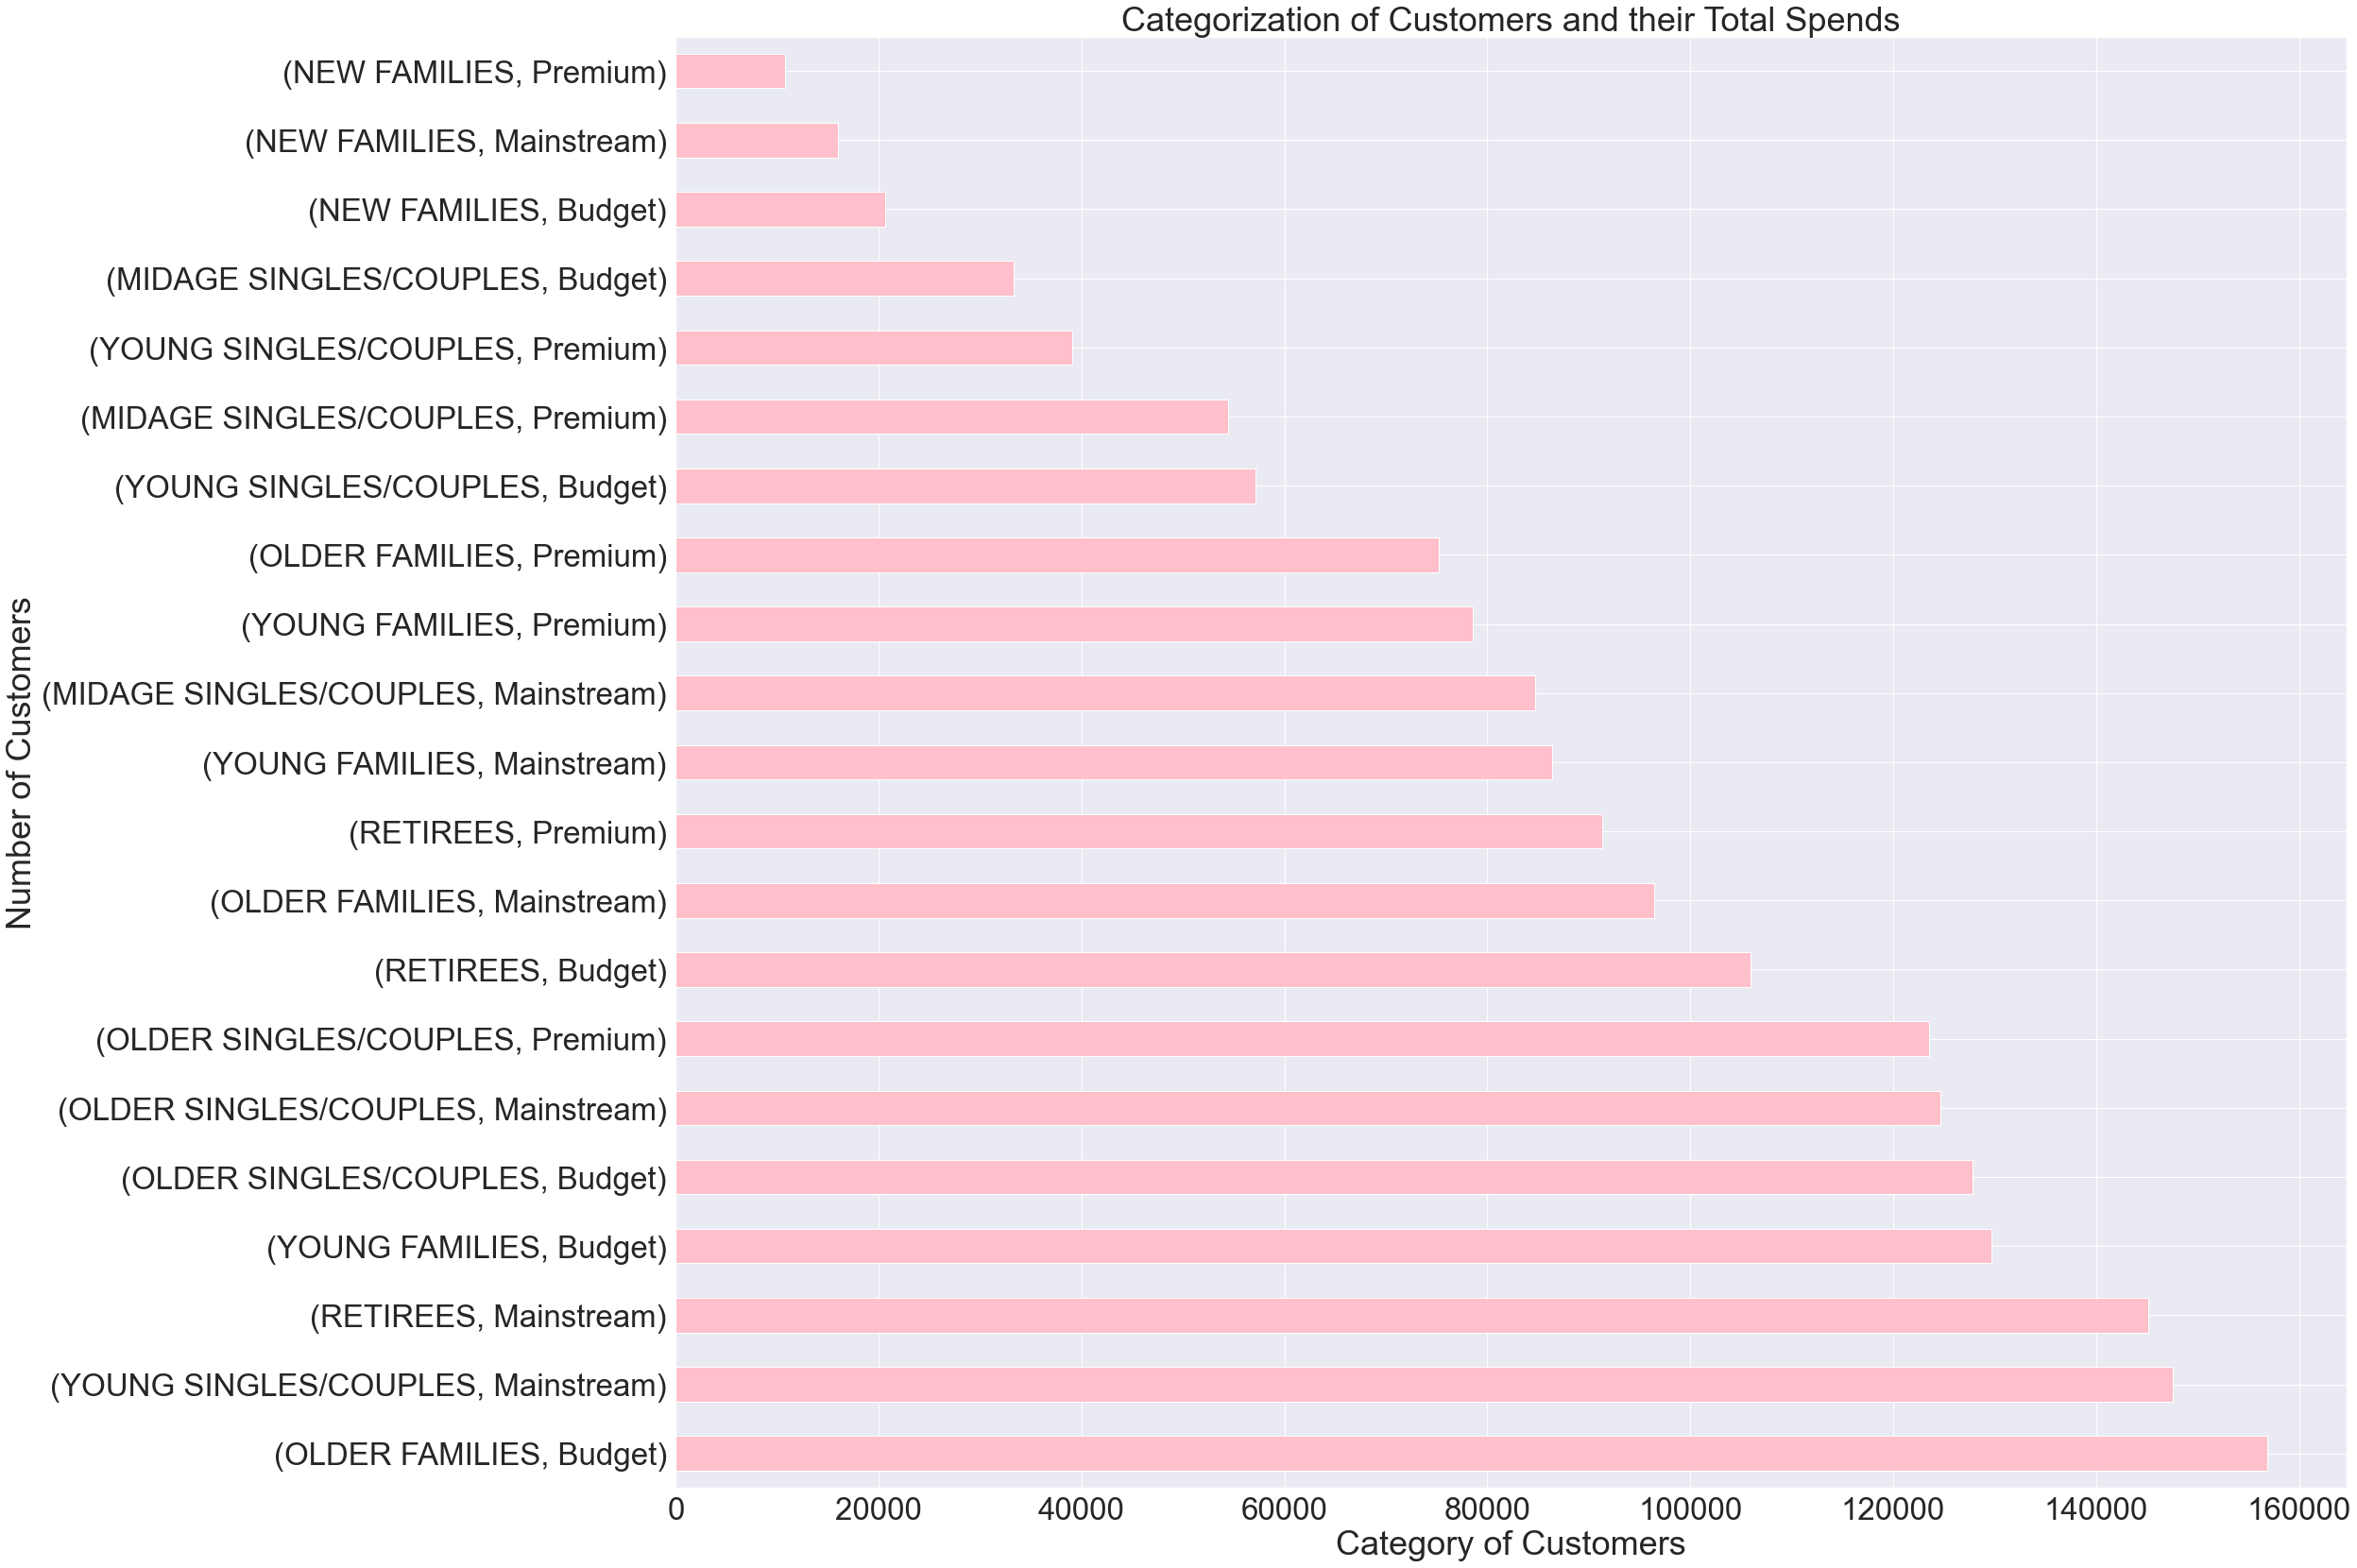

In [658]:
df2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).plot(kind='barh',color='pink')
plt.title('Categorization of Customers and their Total Spends')
plt.xlabel('Category of Customers')
plt.ylabel('Number of Customers')


Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees


How many customers are in each segment

Text(0, 0.5, 'Number of Customers')

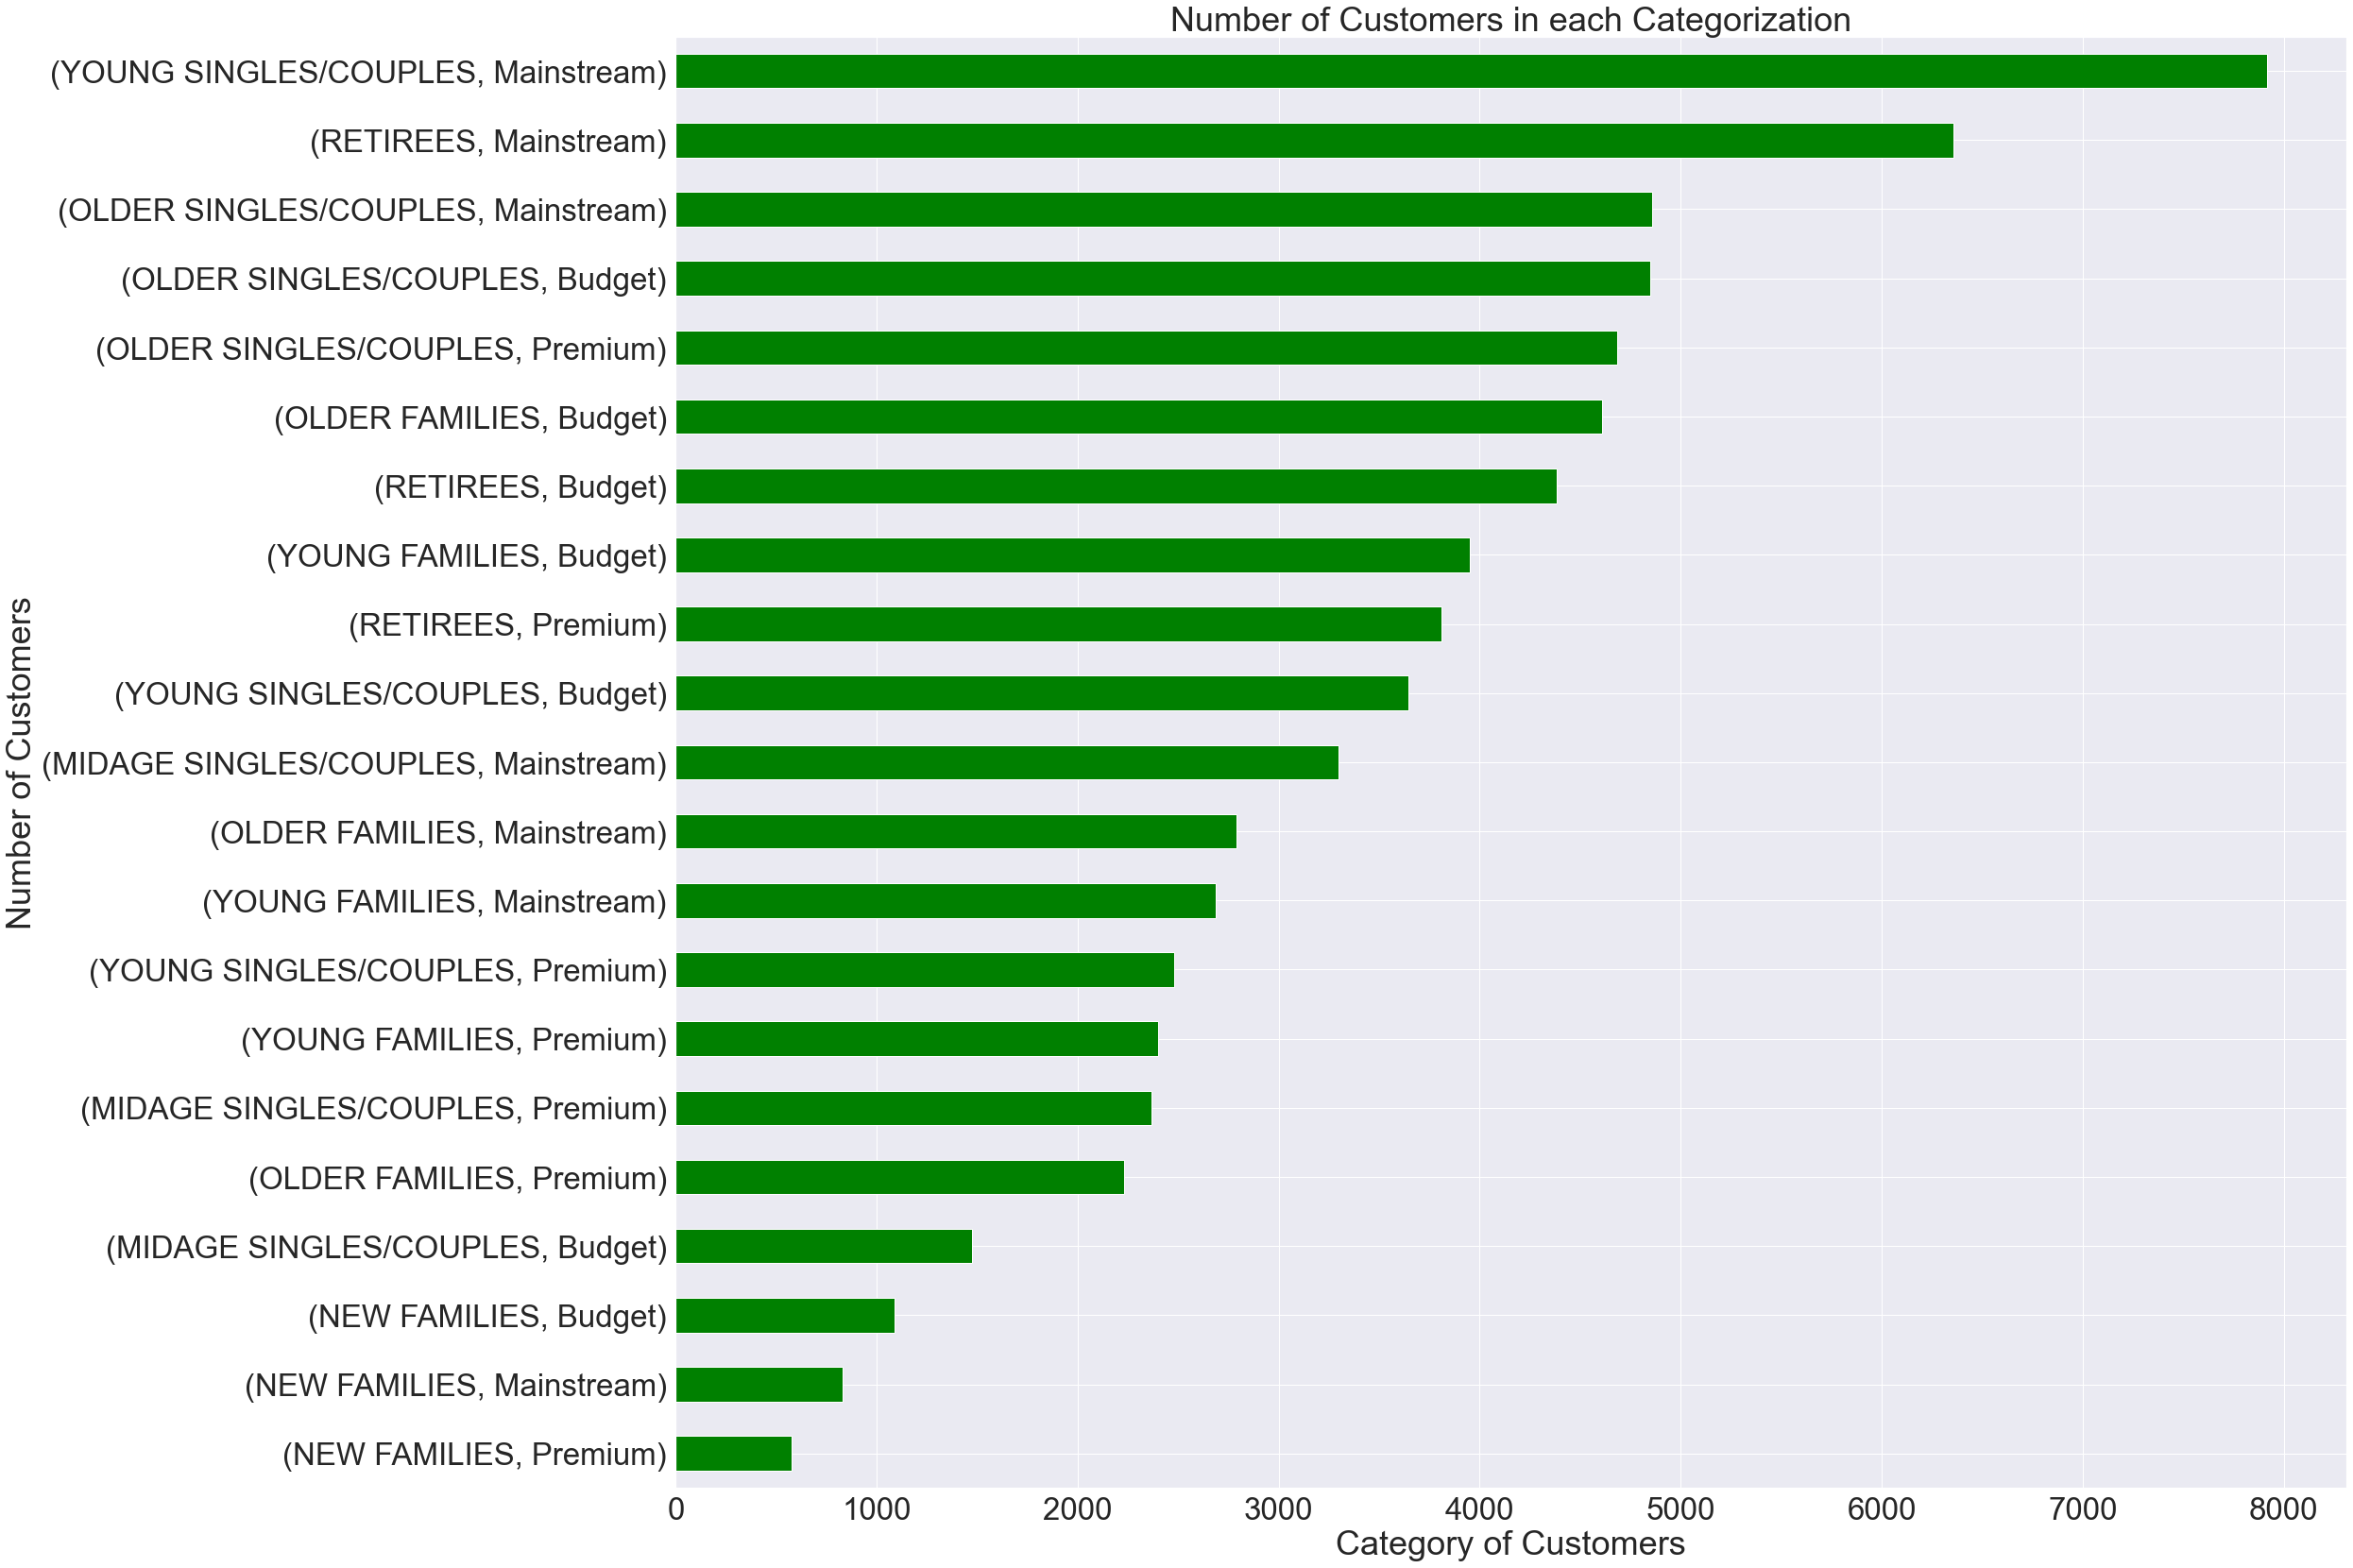

In [665]:
df2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values().plot(kind='barh',color='green')
plt.title('Number of Customers in each Categorization')
plt.xlabel('Category of Customers')
plt.ylabel('Number of Customers')


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.


Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.


Totals

In [680]:
df_chip_QTY_price=df2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','TXN_ID'])['TOT_SALES','PROD_QTY'].sum()

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_1278/3331203067.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_chip_QTY_price=df2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','TXN_ID'])['TOT_SALES','PROD_QTY'].sum()


In [682]:
df_chip_QTY_price=df_chip_QTY_price.reset_index()

In [684]:
df_chip_QTY_price.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,TOT_SALES,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,57,3.3,1
1,MIDAGE SINGLES/COUPLES,Budget,92,4.6,1
2,MIDAGE SINGLES/COUPLES,Budget,93,3.8,2
3,MIDAGE SINGLES/COUPLES,Budget,94,2.9,1
4,MIDAGE SINGLES/COUPLES,Budget,216,3.8,1


In [ ]:
How many chips are bought per customer by segment

Text(0.5, 0, 'Number of Chips Products brought')

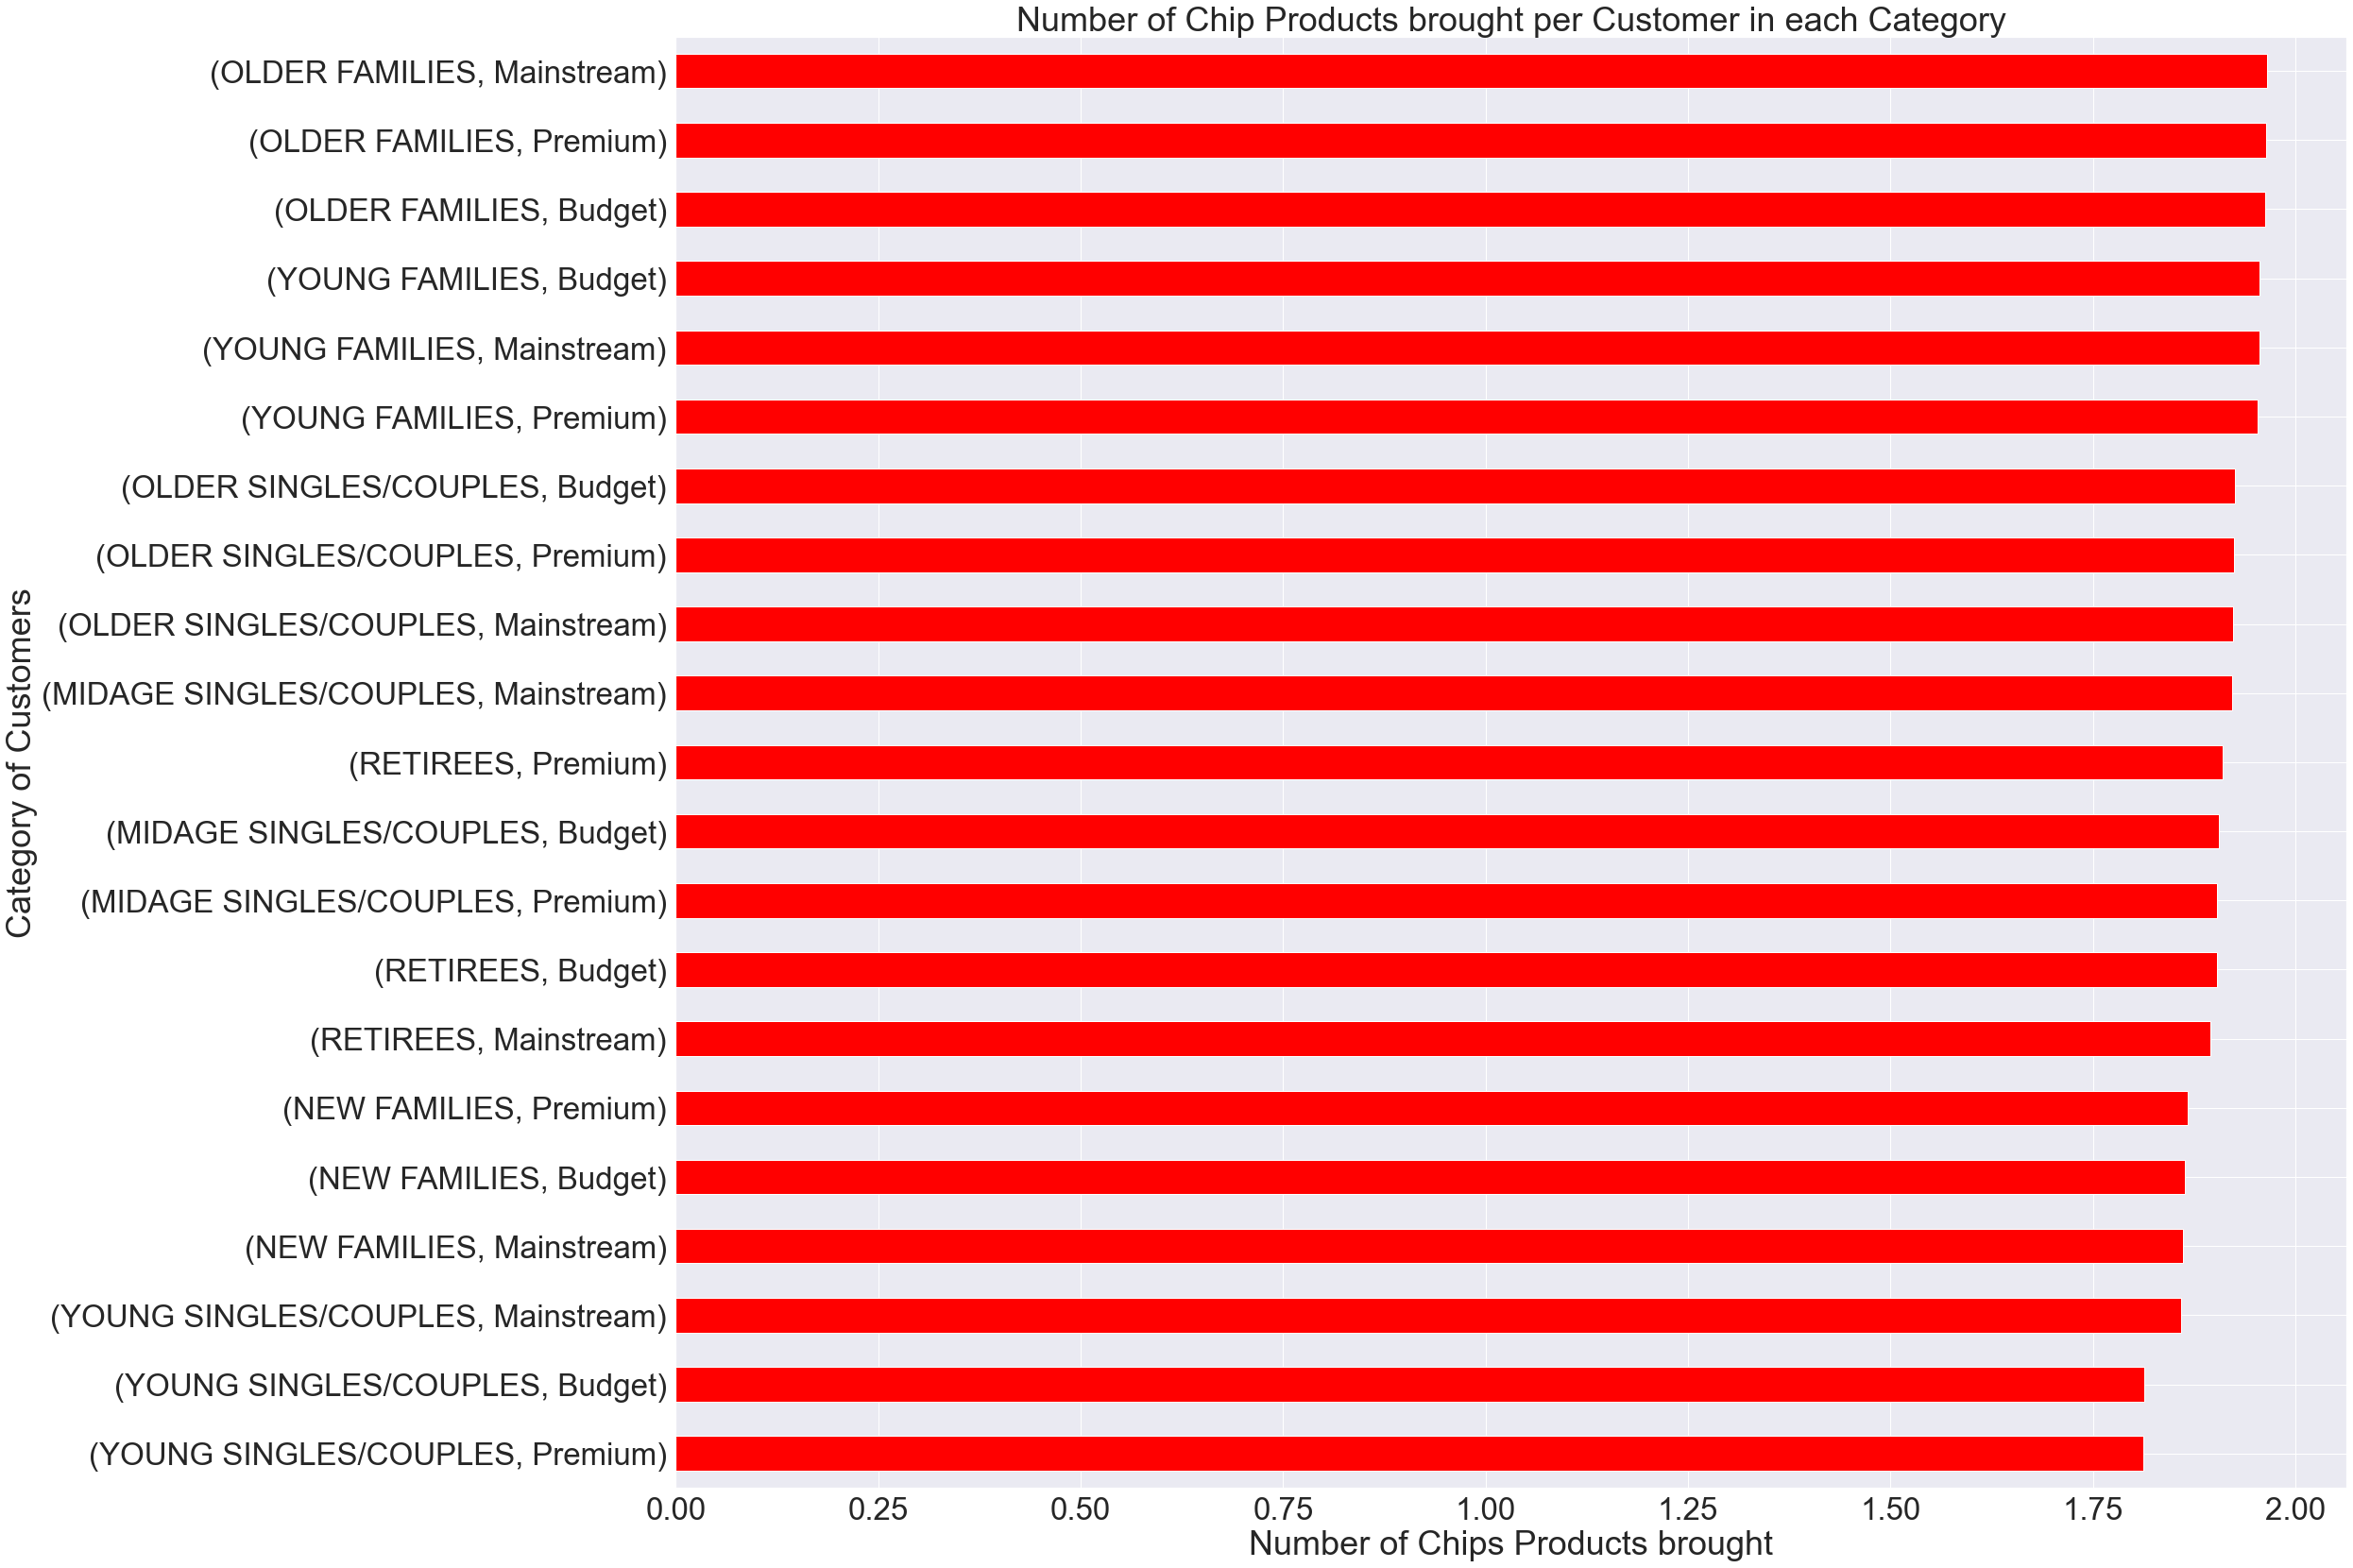

In [704]:
df_chip_QTY_price.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean().sort_values().plot(kind='barh',color='red')
plt.title('Number of Chip Products brought per Customer in each Category')
plt.ylabel('Category of Customers')
plt.xlabel('Number of Chips Products brought')

Older families and young families in general buy more chips per customer


What's the average chip price by customer segment

In [689]:
df_chip_QTY_price_avg_calculation=df_chip_QTY_price.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES','PROD_QTY'].sum()

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_1278/2820970817.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_chip_QTY_price_avg_calculation=df_chip_QTY_price.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES','PROD_QTY'].sum()


In [690]:
df_chip_QTY_price_avg_calculation=df_chip_QTY_price_avg_calculation.reset_index()

In [694]:
df_chip_QTY_price_avg_calculation['AVG']=df_chip_QTY_price_avg_calculation['TOT_SALES']/df_chip_QTY_price_avg_calculation['PROD_QTY']

In [702]:
df_chip_QTY_price_avg_calculation[['LIFESTAGE','PREMIUM_CUSTOMER','AVG']].sort_values(by='AVG')

,LIFESTAGE,PREMIUM_CUSTOMER,AVG
18,YOUNG SINGLES/COUPLES,Budget,3.685297
20,YOUNG SINGLES/COUPLES,Premium,3.692889
8,OLDER FAMILIES,Premium,3.717703
16,YOUNG FAMILIES,Mainstream,3.722439
7,OLDER FAMILIES,Mainstream,3.736380
6,OLDER FAMILIES,Budget,3.747969
0,MIDAGE SINGLES/COUPLES,Budget,3.753878
17,YOUNG FAMILIES,Premium,3.759232
15,YOUNG FAMILIES,Budget,3.761903
2,MIDAGE SINGLES/COUPLES,Premium,3.780823


In [701]:
df_chip_QTY_price_avg_calculation.shape

(21, 5)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.